# Notebook to assemble hospital data set
For the project we need to create a dataset that contains information about all hospitals in Switzerland. The following notebook will do this.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt


### Import data from kzp22_data.xlsx data set provided by Bundesamt für Gesundheit

In [2]:
raw_data = pd.read_excel('../data/raw/kzp22_data.xlsx', sheet_name='KZ2022_KZP22', engine='openpyxl')
raw_data.head()

,JAHR,KT,Inst,Adr,Ort,Typ,RForm,Akt,SL,WB,...,AnlZvOKPStatB,KostAWLFB,KostWBLFB,KostForLFB,ErlAmbStatLangB,ErlOKPAmbB,ErlKVGStatB,ErlKVGStatVB,ErlZvOKPStatB,ErlZvOKPStatVB
0,2022,AG,Kantonsspital Aarau AG,Tellstrasse 25,5000 Aarau,K112,R1,A,"NF, IPS","MSt, Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,AG,Kantonsspital Baden AG,Im Ergel,5404 Baden,K112,R1,A,"NF, IPS","MSt, Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,AG,Hirslanden Klinik Aarau,Schänisweg 1,5000 Aarau,K112,R1,A,"NF, IPS","Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,AG,Gesundheitszentrum Fricktal,Riburgerstrasse 12,4310 Rheinfelden,K121,R1,A,NF,"MSt, Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,AG,Stiftung Spital Muri,Spitalstrasse 144,5630 Muri AG,K121,R2,A,"NF, IPS","MSt, Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Only select hospitals that provide basic care
type = ['K111', 'K112', 'K121', 'K122', 'K123']
hospitals_bc = raw_data[raw_data['Typ'].isin(type)].copy()

hospitals_bc.info()
hospitals_bc.head()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 250
Columns: 145 entries, JAHR to ErlZvOKPStatVB
dtypes: float64(133), int64(1), object(11)
memory usage: 115.2+ KB


,JAHR,KT,Inst,Adr,Ort,Typ,RForm,Akt,SL,WB,...,AnlZvOKPStatB,KostAWLFB,KostWBLFB,KostForLFB,ErlAmbStatLangB,ErlOKPAmbB,ErlKVGStatB,ErlKVGStatVB,ErlZvOKPStatB,ErlZvOKPStatVB
0,2022,AG,Kantonsspital Aarau AG,Tellstrasse 25,5000 Aarau,K112,R1,A,"NF, IPS","MSt, Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,AG,Kantonsspital Baden AG,Im Ergel,5404 Baden,K112,R1,A,"NF, IPS","MSt, Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,AG,Hirslanden Klinik Aarau,Schänisweg 1,5000 Aarau,K112,R1,A,"NF, IPS","Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,AG,Gesundheitszentrum Fricktal,Riburgerstrasse 12,4310 Rheinfelden,K121,R1,A,NF,"MSt, Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,AG,Stiftung Spital Muri,Spitalstrasse 144,5630 Muri AG,K121,R2,A,"NF, IPS","MSt, Arzt, BGs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explore data fields to use as an indicator for the maximum capacity of the hospitals

There dataset has the same type of data for several activity types ('Aktivitätstypen or short Akt'). The activity types have the following meaning:
Zuteilung zu Aktivitätstypen gemäss den von den Betrieben erbrachten Leistungen. Spitäler können die Aktivitätstypen «Akutbehandlung» (A), «Psychiatrie» (P) und «Rehabilitation» (R) aufweisen, von klinischen Institutionen unabhängige Geburtshäuser (B) werden in einem eigenen Aktivitätstyp erfasst.

As we are working on basic medical care, all the hopsitals that we keep in the dataset should at least offer activity type A (Akutbehandlungen) besides potentially offering more services than that.

In [4]:
print(hospitals_bc['Akt'].unique())

['A' 'A, P' 'A, R' 'A, P, R']


It seems that all hopsitals in the hospitals_bc DataFrame offer at least activity type A

**From the description "BettenStatA" should be a good indicator for the maximum capacity of a hospital**

Die durchschnittliche Anzahl der zur Bewirtschaftung zur Verfügung stehenden Betten entspricht der Anzahl Bettenbetriebstage dividiert durch
365 resp. 366 für Schaltjahre; ausgewiesen pro Aktivitätstyp.

<Axes: >

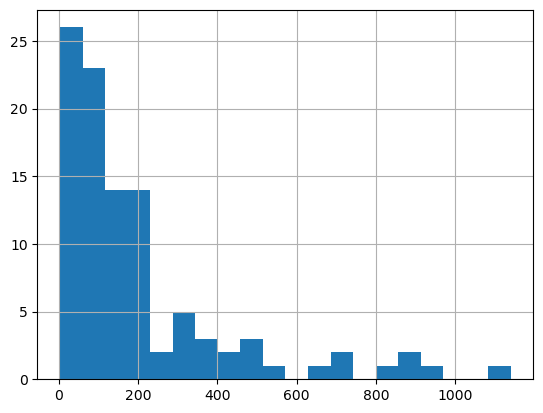

In [5]:
hospitals_bc['BettenStatA'].hist(bins=20)


In [6]:
print(hospitals_bc[hospitals_bc['BettenStatA'].isna()].count())
# There are no empty rows in the 'BettenStatA column

JAHR              0
KT                0
Inst              0
Adr               0
Ort               0
                 ..
ErlOKPAmbB        0
ErlKVGStatB       0
ErlKVGStatVB      0
ErlZvOKPStatB     0
ErlZvOKPStatVB    0
Length: 145, dtype: int64


### Explore data fields to use as an indicator for the occupancy of hospitals

**From the description "pBettenBelStatA" should be a good indicator:**

Der Belegungsgrad der Betten (ohne gesunde Neugeborene, ohne Langzeitpflege) ergibt sich aus der Anzahl Pflegetage dividiert durch die Anzahl
Bettenbetriebstage; ausgewiesen pro Aktivitätstyp.

<Axes: >

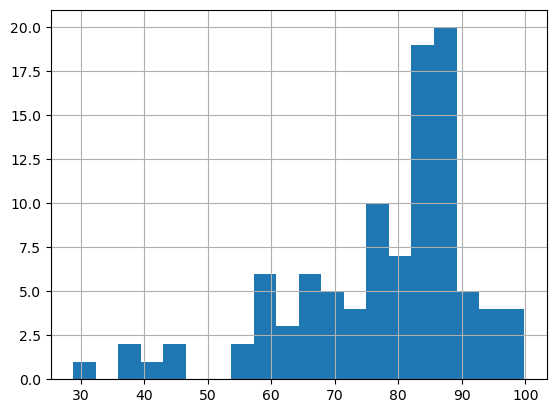

In [7]:
hospitals_bc['pBettenBelStatA'].hist(bins=20)
# There seems to be a tail of hospitals not seeing a very good utilization.

In [8]:
print(hospitals_bc[hospitals_bc['pBettenBelStatA'].isna()].count())
# There are no empty rows in the 'pBettenBelStatA column

JAHR              0
KT                0
Inst              0
Adr               0
Ort               0
                 ..
ErlOKPAmbB        0
ErlKVGStatB       0
ErlKVGStatVB      0
ErlZvOKPStatB     0
ErlZvOKPStatVB    0
Length: 145, dtype: int64


# Understanding of the relationship between BettenStatA, pBettenBelStatA and PtageStatMSA

For our knockout algorithm we will need to be able to caluclate the occupancy of hospitals when distributing the 

| Column          | Use                                             | Description                                                               |
| --------------- | ----------------------------------------------- | ------------------------------------------------------------------------- |
| BettenStatA     | Capacity of hospital                            | Betten stationär                                                          |
| pBettenBelStatA | Occupancy of hospital                           | Belegungsgrad der Betten (ohne gesunde Neugeborene, ohne Langzeitpflege)  |
| PtageStatMSA    | Quantifies the service provided by the hospital | Gesamtzahl der Pflegetage (ohne Langzeitbehandlung)                       |


pBettenBelStatA = PtageStatMSA / (BettenStatA * 365) * 100



In [13]:
var_rel = hospitals_bc[['PtageStatMSA', 'BettenStatA', 'pBettenBelStatA']].copy()
var_rel['occupancy'] =  hospitals_bc['PtageStatMSA'] / (hospitals_bc['BettenStatA'] * 365) * 100
# var_rel['equal'] = var_rel['pBettenBelStatA'] == var_rel['occupancy']
var_rel.head()

,PtageStatMSA,BettenStatA,pBettenBelStatA,occupancy
0,137818.0,493.989041,77.967455,76.435615
1,121129.0,364.000000,87.638868,91.170405
2,45252.0,155.000000,76.772426,79.985859
3,38665.0,128.860274,79.852872,82.206489
4,33185.0,101.000000,86.906280,90.017632


apparently the recalculation did not work out and pBettenBelStatA is not equal to occupancy. The iscause of this deviation is that in the dataset pBettenBelStatA is calculated as follows : pBettenBelStatA = KS X1.01.01 / KS X1.02.01 * 100 (KS values refer to the source of the data).

While BettenStatA = KS X1.02.01 * 365 (for non-leap years and KS X1.02.01 / 365 for leapyears / 2022 is not a leap year), we can accurately calculate KS X1.02.01 

However PtageStatMSA is not equal to KS X1.01.01

We can however derrive KS X1.01.01 by reverse engineering.

In [27]:
var_rel['care_days'] = var_rel['pBettenBelStatA'] * (var_rel['BettenStatA'] * 365) / 100
var_rel['occupancy_v2'] =  var_rel['care_days'] / (var_rel['BettenStatA'] * 365) * 100
var_rel['diff_v2'] = abs(var_rel['occupancy_v2'] - var_rel['pBettenBelStatA'])
print(f'maximum difference from actual value is {var_rel['diff_v2'].max()}')
var_rel.head()

maximum difference from actual value is 1.4210854715202004e-14


,PtageStatMSA,BettenStatA,pBettenBelStatA,occupancy,care_days,occupancy_v2,equal_v2,diff_v2
0,137818.0,493.989041,77.967455,76.435615,140580.0,77.967455,True,0.000000e+00
1,121129.0,364.000000,87.638868,91.170405,116437.0,87.638868,True,0.000000e+00
2,45252.0,155.000000,76.772426,79.985859,43434.0,76.772426,True,0.000000e+00
3,38665.0,128.860274,79.852872,82.206489,37558.0,79.852872,False,1.421085e-14
4,33185.0,101.000000,86.906280,90.017632,32038.0,86.906280,True,0.000000e+00
